In [4]:
# Cell 1 - Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
# Cell 2 - Load Data
# Upload your Titanic-Dataset.csv first
df = pd.read_csv('/content/Titanic-Dataset.csv')

print("Dataset loaded!")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset loaded!
Shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Cell 3 - Exploratory Data Analysis
print("=== DATA EXPLORATION ===")
print(f"Dataset shape: {df.shape}")
print("\nMissing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
df.describe()

=== DATA EXPLORATION ===
Dataset shape: (891, 12)

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Basic statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


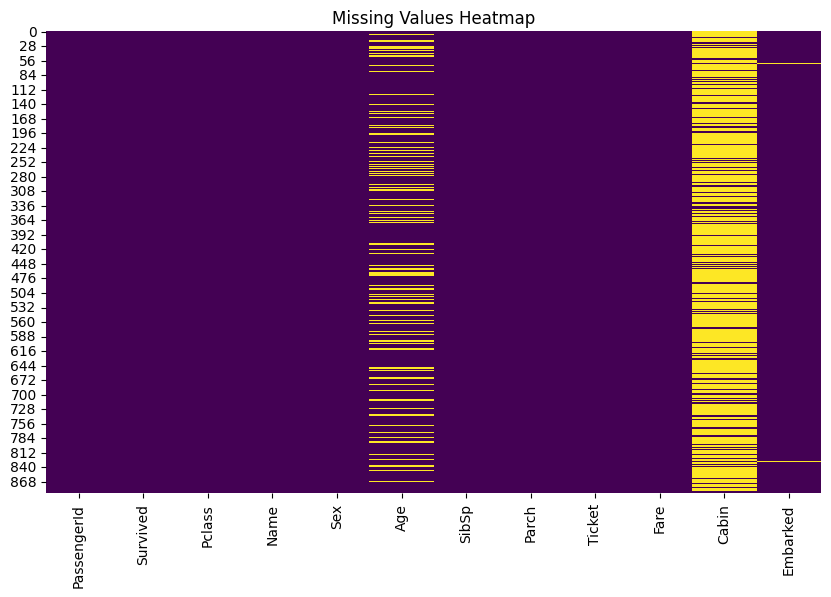

Missing values percentage:
Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [7]:
# Cell 4 - Visualize Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Missing values percentage:")
print(missing_percent[missing_percent > 0])

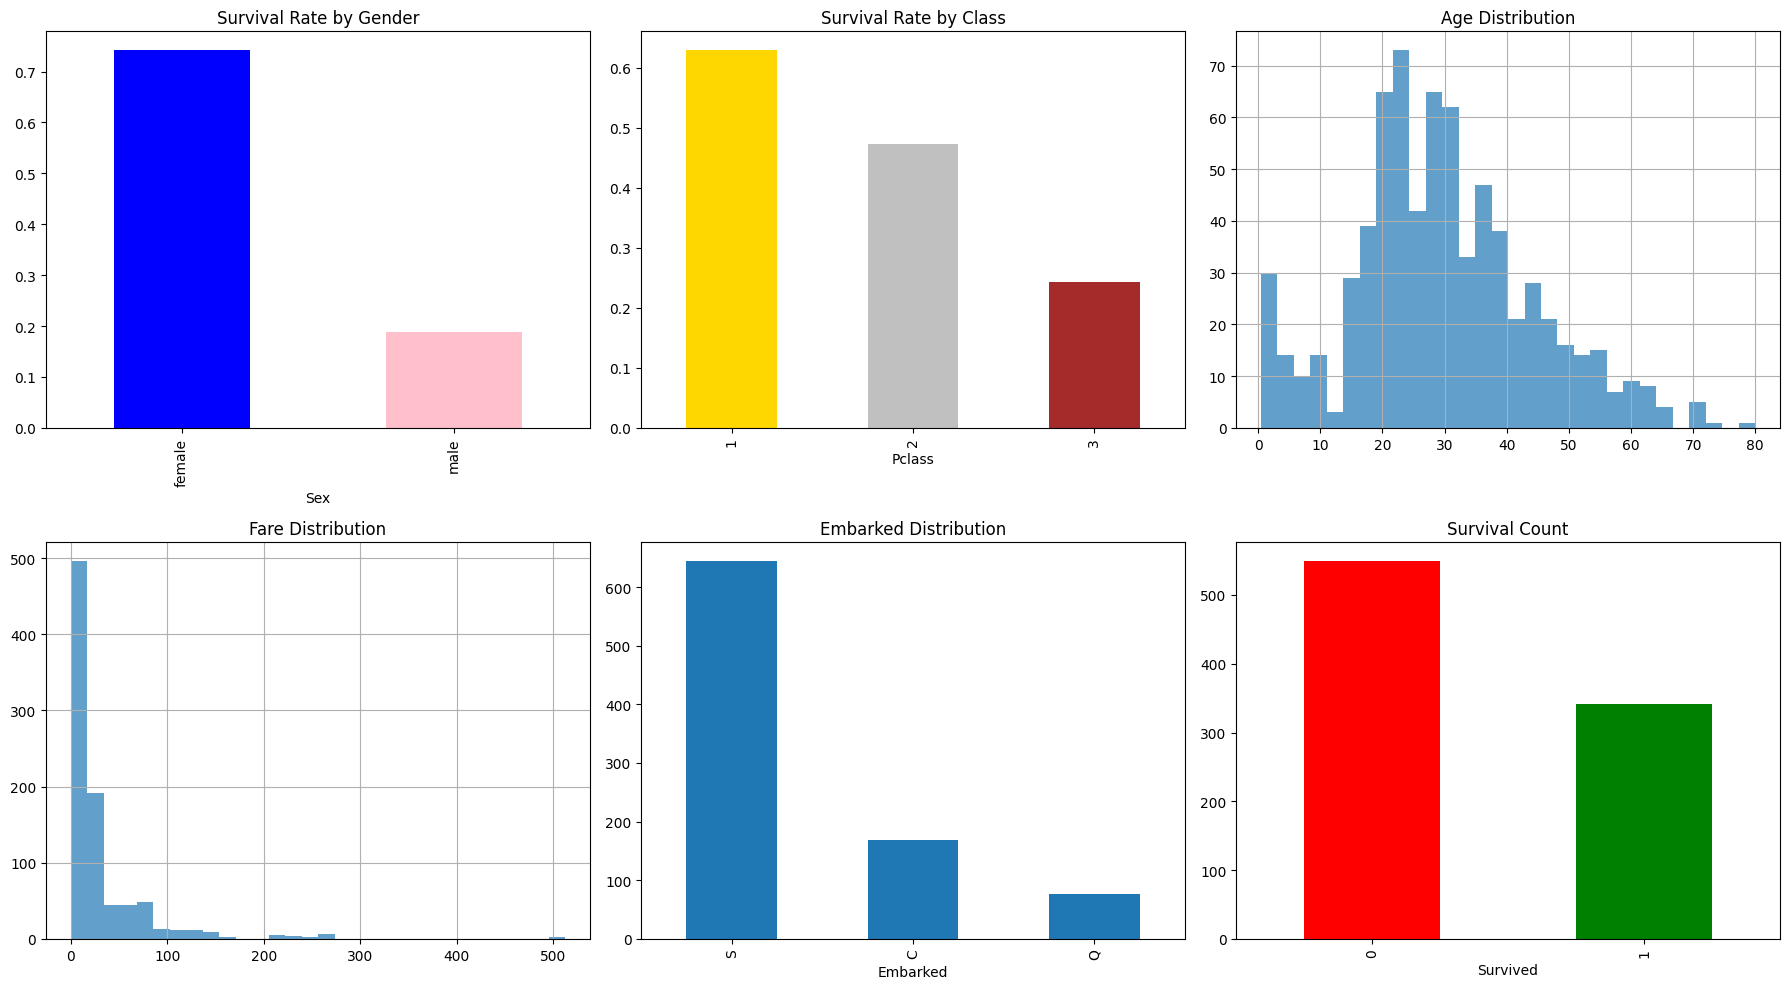

In [8]:
# Cell 5 - Data Visualization Before Preprocessing
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Survival rate by gender
df.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=axes[0,0], color=['blue', 'pink'])
axes[0,0].set_title('Survival Rate by Gender')

# Survival rate by class
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=axes[0,1], color=['gold', 'silver', 'brown'])
axes[0,1].set_title('Survival Rate by Class')

# Age distribution
df['Age'].hist(bins=30, ax=axes[0,2], alpha=0.7)
axes[0,2].set_title('Age Distribution')

# Fare distribution
df['Fare'].hist(bins=30, ax=axes[1,0], alpha=0.7)
axes[1,0].set_title('Fare Distribution')

# Embarked
df['Embarked'].value_counts().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Embarked Distribution')

# Survival count
df['Survived'].value_counts().plot(kind='bar', ax=axes[1,2], color=['red', 'green'])
axes[1,2].set_title('Survival Count')

plt.tight_layout()
plt.show()

In [9]:
# Cell 6 - PREPROCESSING

# Copy original data
df_clean = df.copy()

print("=== STARTING PREPROCESSING ===")

# 1. Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_clean = df_clean.drop(columns_to_drop, axis=1)
print("✓ Dropped unnecessary columns")

# 2. Handle missing values - Age
df_clean['Age'] = df_clean.groupby('Pclass')['Age'].transform(
    lambda x: x.fillna(x.median()))
print("✓ Filled missing Age values")

# 3. Handle missing values - Embarked (only 2 rows)
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])
print("✓ Filled missing Embarked values")

# 4. Encode categorical variables
# Sex: male=0, female=1
df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})

# Embarked: one-hot encoding
df_clean = pd.get_dummies(df_clean, columns=['Embarked'], prefix='Embarked')
print("✓ Encoded categorical variables")

# 5. Feature Engineering
df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1
df_clean['IsAlone'] = (df_clean['FamilySize'] == 1).astype(int)

# Create Age groups
df_clean['AgeGroup'] = pd.cut(df_clean['Age'],
                            bins=[0, 12, 18, 35, 60, 100],
                            labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
df_clean = pd.get_dummies(df_clean, columns=['AgeGroup'], prefix='AgeGroup')
print("✓ Created new features")

print("\n=== PREPROCESSING COMPLETE ===")
print(f"Final shape: {df_clean.shape}")
print("\nMissing values after preprocessing:")
print(df_clean.isnull().sum().sum())  # Should be 0

=== STARTING PREPROCESSING ===
✓ Dropped unnecessary columns
✓ Filled missing Age values
✓ Filled missing Embarked values
✓ Encoded categorical variables
✓ Created new features

=== PREPROCESSING COMPLETE ===
Final shape: (891, 17)

Missing values after preprocessing:
0


In [10]:
# Cell 7 - Check Processed Data
print("Processed Dataset Info:")
print(df_clean.info())
print("\nFirst 5 rows of processed data:")
df_clean.head()

Processed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    int64  
 3   Age              891 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Fare             891 non-null    float64
 7   Embarked_C       891 non-null    bool   
 8   Embarked_Q       891 non-null    bool   
 9   Embarked_S       891 non-null    bool   
 10  FamilySize       891 non-null    int64  
 11  IsAlone          891 non-null    int64  
 12  AgeGroup_Child   891 non-null    bool   
 13  AgeGroup_Teen    891 non-null    bool   
 14  AgeGroup_Adult   891 non-null    bool   
 15  AgeGroup_Middle  891 non-null    bool   
 16  AgeGroup_Senior  891 non-null    bool 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Middle,AgeGroup_Senior
0,0,3,0,22.0,1,0,7.2500,False,False,True,2,0,False,False,True,False,False
1,1,1,1,38.0,1,0,71.2833,True,False,False,2,0,False,False,False,True,False
2,1,3,1,26.0,0,0,7.9250,False,False,True,1,1,False,False,True,False,False
3,1,1,1,35.0,1,0,53.1000,False,False,True,2,0,False,False,True,False,False
4,0,3,0,35.0,0,0,8.0500,False,False,True,1,1,False,False,True,False,False


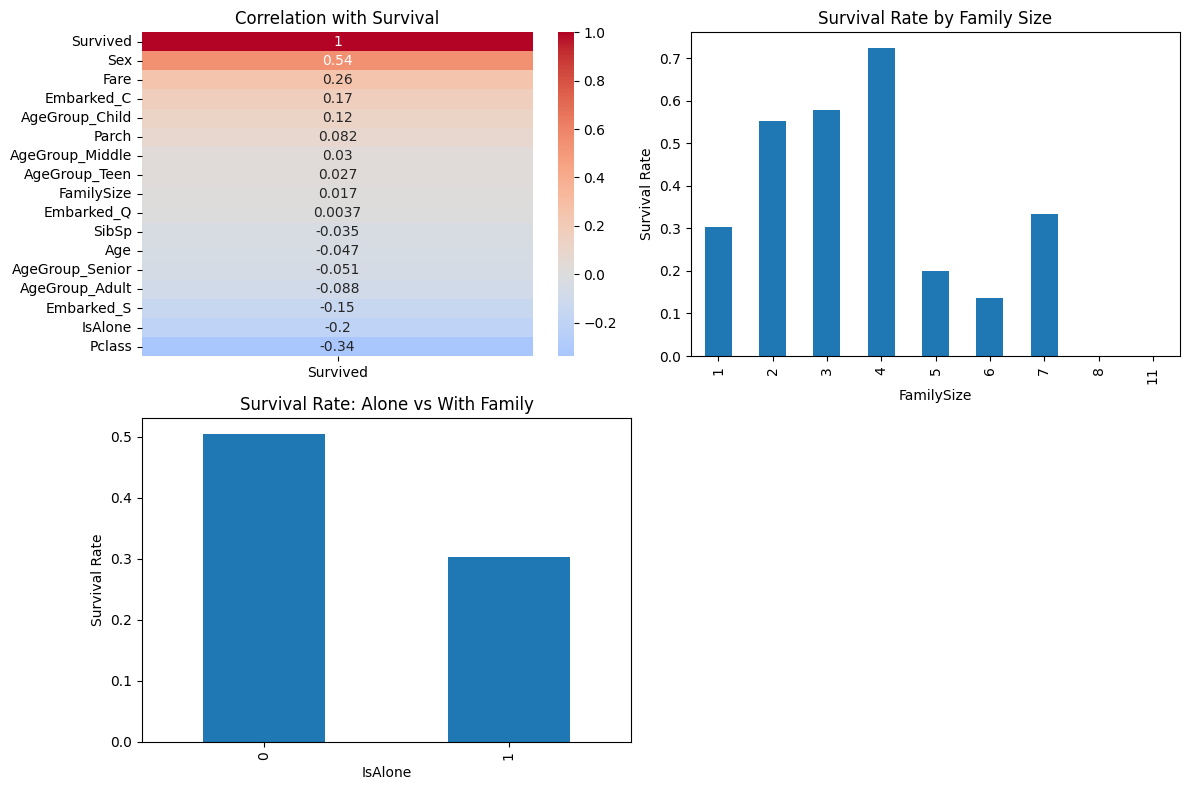

In [11]:
# Cell 8 - Data Visualization After Preprocessing
plt.figure(figsize=(12, 8))

# Correlation heatmap
plt.subplot(2, 2, 1)
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix[['Survived']].sort_values('Survived', ascending=False),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation with Survival')

# Family Size vs Survival
plt.subplot(2, 2, 2)
df_clean.groupby('FamilySize')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')

# IsAlone vs Survival
plt.subplot(2, 2, 3)
df_clean.groupby('IsAlone')['Survived'].mean().plot(kind='bar')
plt.title('Survival Rate: Alone vs With Family')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

In [12]:
# Cell 9 - Prepare Data for Modeling
# Separate features and target
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nFeatures columns:")
print(X.columns.tolist())

Features shape: (891, 16)
Target shape: (891,)

Features columns:
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'AgeGroup_Child', 'AgeGroup_Teen', 'AgeGroup_Adult', 'AgeGroup_Middle', 'AgeGroup_Senior']


In [13]:
# Cell 10 - Split Data & Train Decision Tree
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

print("✓ Decision Tree model trained!")

Training set: (712, 16)
Testing set: (179, 16)
✓ Decision Tree model trained!


🎯 Model Accuracy: 0.7598 (75.98%)

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       110
           1       0.74      0.58      0.65        69

    accuracy                           0.76       179
   macro avg       0.75      0.73      0.73       179
weighted avg       0.76      0.76      0.75       179



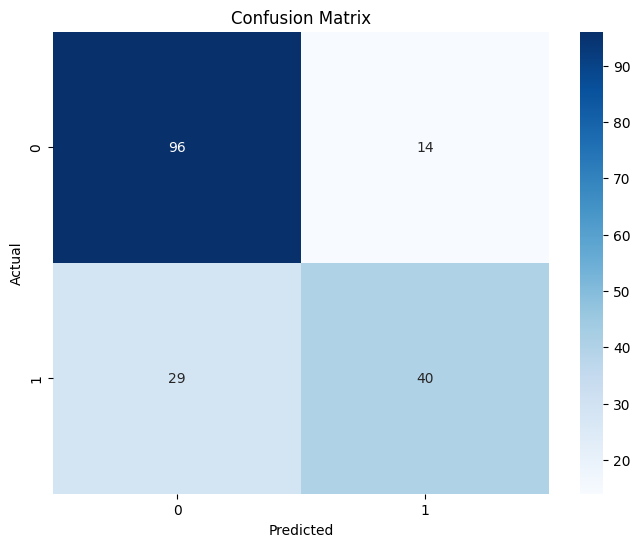

In [14]:
# Cell 11 - Model Evaluation
# Predictions
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

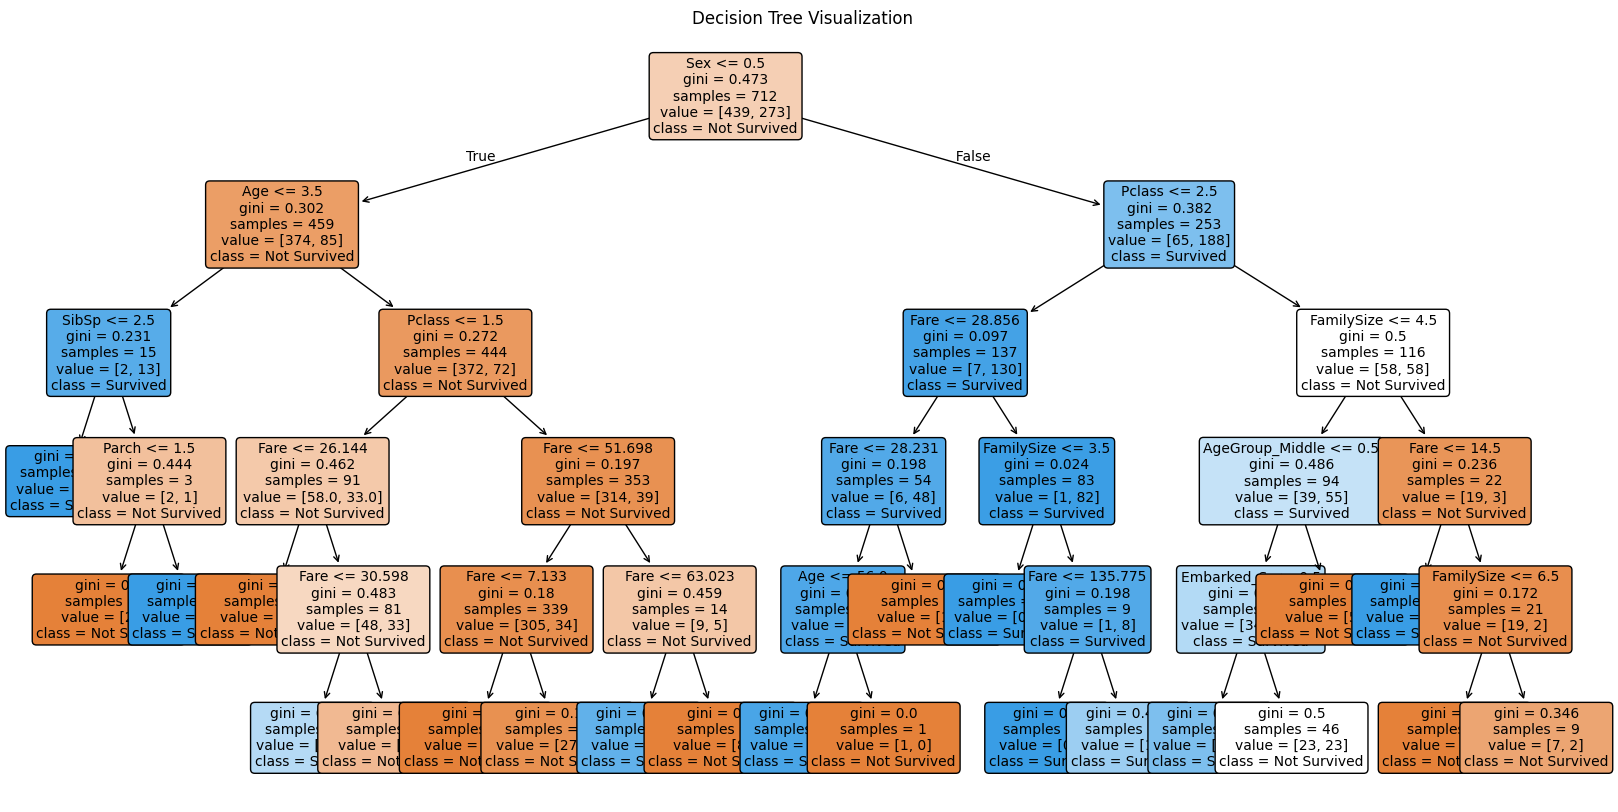

In [15]:
# Cell 12 - Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

🔍 Feature Importance:
            feature  importance
1               Sex    0.541593
0            Pclass    0.184122
5              Fare    0.094549
2               Age    0.085751
9        FamilySize    0.042066
14  AgeGroup_Middle    0.019288
8        Embarked_S    0.014138
3             SibSp    0.011380
4             Parch    0.007112
6        Embarked_C    0.000000
7        Embarked_Q    0.000000
10          IsAlone    0.000000
11   AgeGroup_Child    0.000000
12    AgeGroup_Teen    0.000000
13   AgeGroup_Adult    0.000000
15  AgeGroup_Senior    0.000000


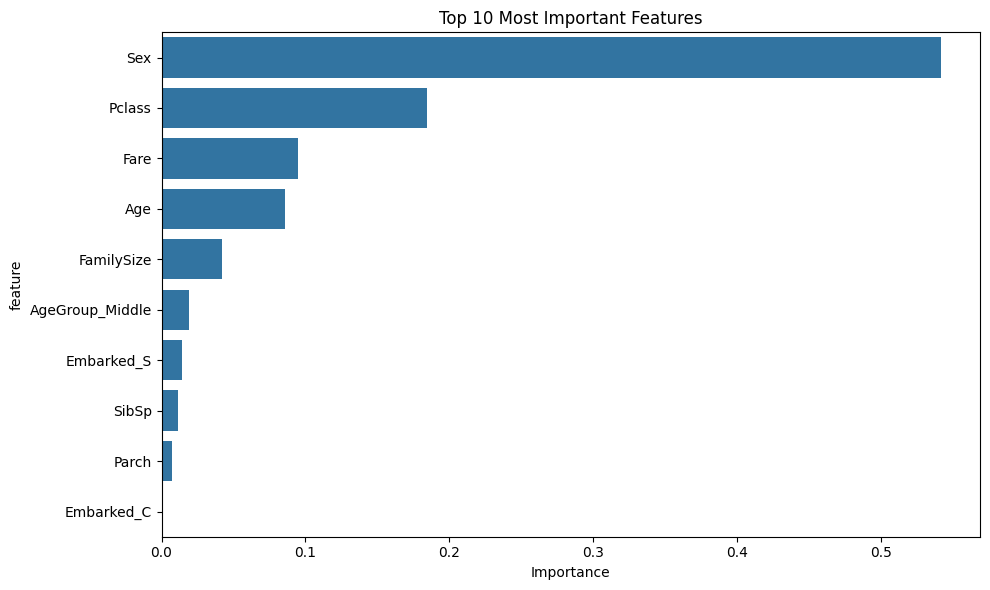

In [16]:
# Cell 13 - Feature Importance
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("🔍 Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()